=== TRAIN SET ===
Normal: 1750 gambar
TB: 1750 gambar
=== TEST SET ===
Normal: 375 gambar
TB: 375 gambar


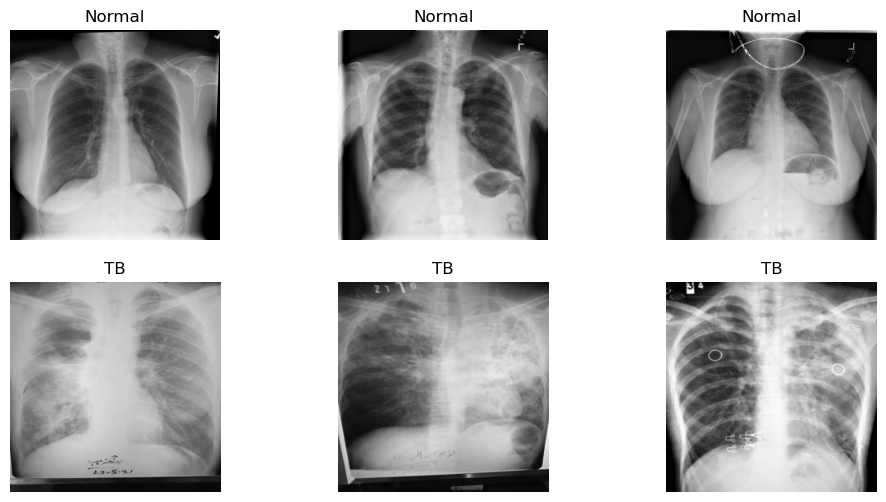


  CROSS VALIDATION EVALUATION 

--- Fold 1/5 ---


c:\Users\MP2MS\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MP2MS\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5 | Train Loss: 0.6830 | Val Loss: 0.6501
Epoch 2/5 | Train Loss: 0.6424 | Val Loss: 0.6242
Epoch 3/5 | Train Loss: 0.6126 | Val Loss: 0.5738
Epoch 4/5 | Train Loss: 0.5712 | Val Loss: 0.5391
Epoch 5/5 | Train Loss: 0.5403 | Val Loss: 0.5118


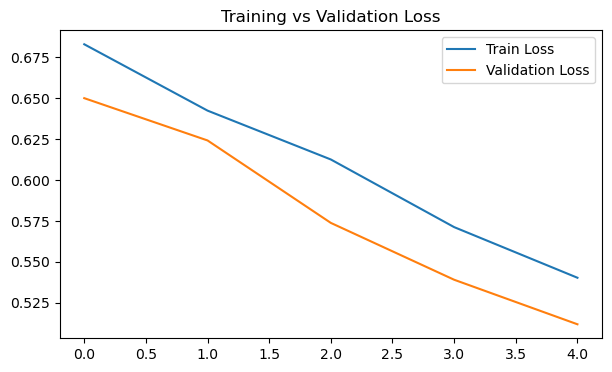

Fold 1 Accuracy: 92.12%

--- Fold 2/5 ---
Epoch 1/5 | Train Loss: 0.6757 | Val Loss: 0.6435
Epoch 2/5 | Train Loss: 0.6281 | Val Loss: 0.6025
Epoch 3/5 | Train Loss: 0.5872 | Val Loss: 0.5606
Epoch 4/5 | Train Loss: 0.5491 | Val Loss: 0.5230
Epoch 5/5 | Train Loss: 0.5223 | Val Loss: 0.4747


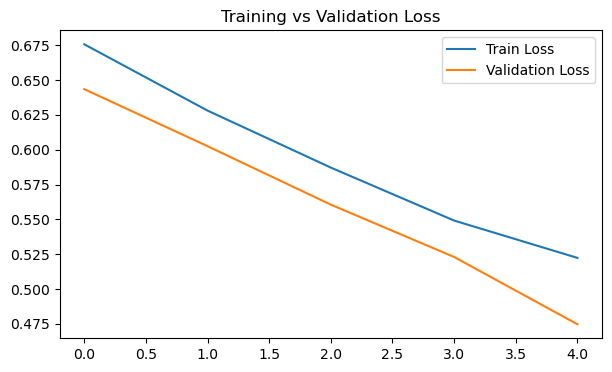

Fold 2 Accuracy: 91.65%

--- Fold 3/5 ---
Epoch 1/5 | Train Loss: 0.6770 | Val Loss: 0.6457
Epoch 2/5 | Train Loss: 0.6308 | Val Loss: 0.6074
Epoch 3/5 | Train Loss: 0.5982 | Val Loss: 0.5673
Epoch 4/5 | Train Loss: 0.5608 | Val Loss: 0.5405
Epoch 5/5 | Train Loss: 0.5325 | Val Loss: 0.4960


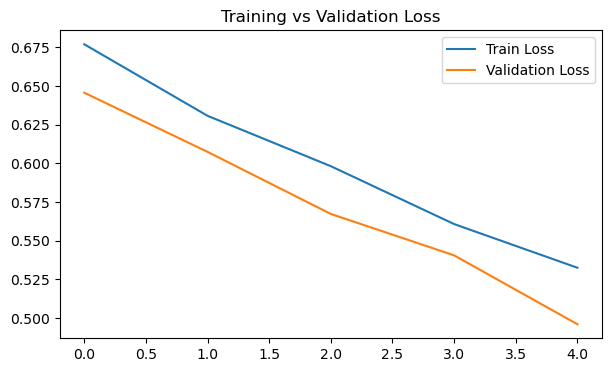

Fold 3 Accuracy: 90.47%

--- Fold 4/5 ---
Epoch 1/5 | Train Loss: 0.6804 | Val Loss: 0.6491
Epoch 2/5 | Train Loss: 0.6329 | Val Loss: 0.6067
Epoch 3/5 | Train Loss: 0.5962 | Val Loss: 0.5625
Epoch 4/5 | Train Loss: 0.5601 | Val Loss: 0.5337
Epoch 5/5 | Train Loss: 0.5310 | Val Loss: 0.5164


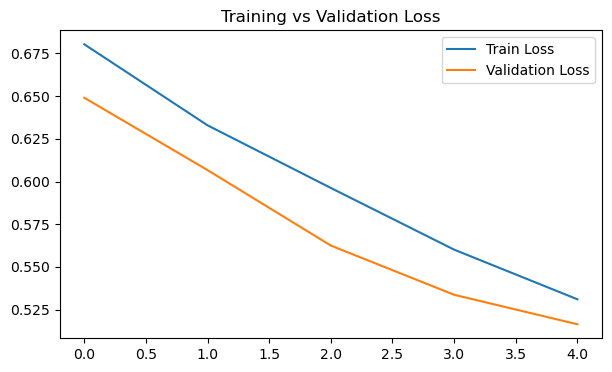

Fold 4 Accuracy: 89.65%

--- Fold 5/5 ---
Epoch 1/5 | Train Loss: 0.6830 | Val Loss: 0.6429
Epoch 2/5 | Train Loss: 0.6318 | Val Loss: 0.5974
Epoch 3/5 | Train Loss: 0.5943 | Val Loss: 0.5603
Epoch 4/5 | Train Loss: 0.5562 | Val Loss: 0.5272
Epoch 5/5 | Train Loss: 0.5239 | Val Loss: 0.4802


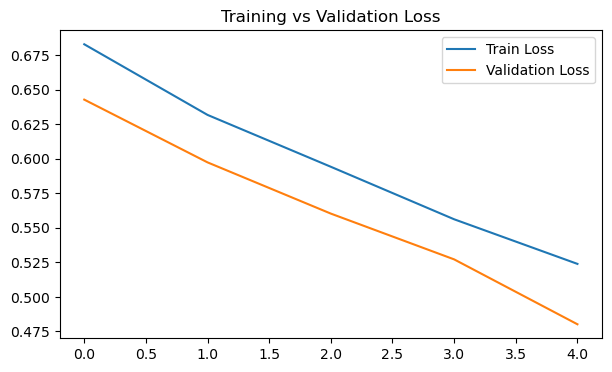

Fold 5 Accuracy: 92.00%

===== CROSS VALIDATION RESULT =====
Mean Accuracy : 91.18%
Std Deviation : 0.96%


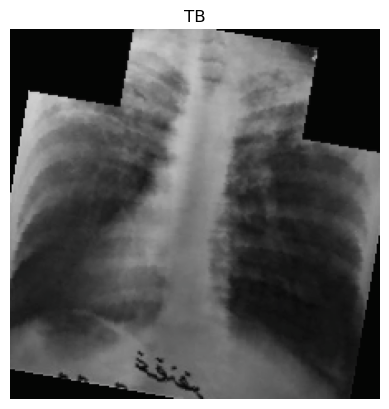

Epoch 1/100 | Train Loss: 0.6731 | Val Loss: 0.6476
Epoch 2/100 | Train Loss: 0.6322 | Val Loss: 0.5975
Epoch 3/100 | Train Loss: 0.5933 | Val Loss: 0.5615
Epoch 4/100 | Train Loss: 0.5550 | Val Loss: 0.5182
Epoch 5/100 | Train Loss: 0.5293 | Val Loss: 0.4939
Epoch 6/100 | Train Loss: 0.4960 | Val Loss: 0.4720
Epoch 7/100 | Train Loss: 0.4634 | Val Loss: 0.4262
Epoch 8/100 | Train Loss: 0.4514 | Val Loss: 0.4082
Epoch 9/100 | Train Loss: 0.4227 | Val Loss: 0.3942
Epoch 10/100 | Train Loss: 0.4064 | Val Loss: 0.3638
Epoch 11/100 | Train Loss: 0.3873 | Val Loss: 0.3463
Epoch 12/100 | Train Loss: 0.3775 | Val Loss: 0.3323
Epoch 13/100 | Train Loss: 0.3561 | Val Loss: 0.3105
Epoch 14/100 | Train Loss: 0.3424 | Val Loss: 0.3100
Epoch 15/100 | Train Loss: 0.3332 | Val Loss: 0.2821
Epoch 16/100 | Train Loss: 0.3239 | Val Loss: 0.2795
Epoch 17/100 | Train Loss: 0.3139 | Val Loss: 0.2751
Epoch 18/100 | Train Loss: 0.3013 | Val Loss: 0.2707
Epoch 19/100 | Train Loss: 0.2945 | Val Loss: 0.2548
Ep

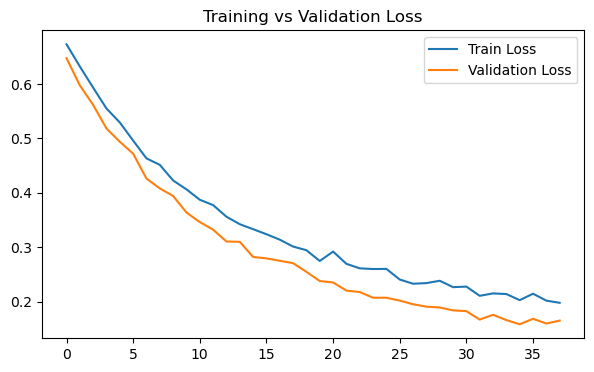

  Accuracy Result  
Accuracy: 97.33%

== CLASSIFICATION REPORT ==
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       375
          TB       0.98      0.97      0.97       375

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



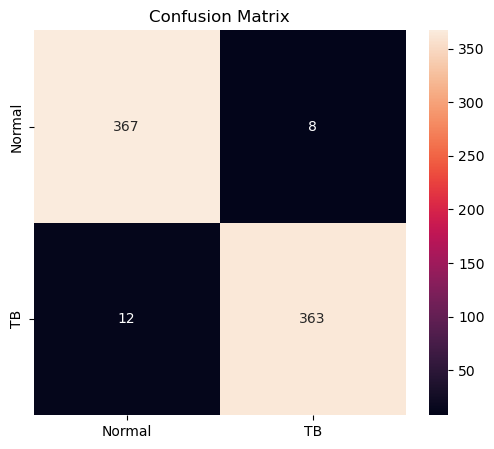

In [ ]:
# ResNet50 TB Detection with EDA

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from PIL import Image
from sklearn.model_selection import KFold
from torch.utils.data import Subset, ConcatDataset



# 1. EDA DATASET
DATA_DIR = "data"  
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")
VAL_DIR = os.path.join(DATA_DIR, "val")

# ngitung jumlah gambar per kelas
for split in ["train", "test"]:
    print(f"=== {split.upper()} SET ===")
    for cls in os.listdir(os.path.join(DATA_DIR, split)):
        path = os.path.join(DATA_DIR, split, cls)
        if os.path.isdir(path):
            print(f"{cls}: {len(os.listdir(path))} gambar")

# Tampilin contoh gambar
def show_sample_images(folder, n=6):
    import random
    imgs = []
    labels = []
    classes = os.listdir(folder)
    for cls in classes:
        cls_folder = os.path.join(folder, cls)
        files = os.listdir(cls_folder)
        samples = random.sample(files, min(n//2, len(files)))
        for s in samples:
            imgs.append(os.path.join(cls_folder, s))
            labels.append(cls)

    plt.figure(figsize=(12,6))
    for i, (img_path, label) in enumerate(zip(imgs, labels)):
        from PIL import Image
        img = Image.open(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(label)
        plt.axis("off")
    plt.show()

show_sample_images(TRAIN_DIR)

class MaskCorners(object):
    def __call__(self, img):
        # img: PIL Image
        img = np.array(img).copy()
        h, w, _ = img.shape

        mask_h = int(h * 0.25)
        mask_w = int(w * 0.25)

        # Pojok kiri atas
        img[0:mask_h, 0:mask_w, :] = 0

        # Pojok kanan atas
        img[0:mask_h, w-mask_w:w, :] = 0

        return Image.fromarray(img)



# 2. DATA TRANSFORM
transforms_train = transforms.Compose([
MaskCorners(),
transforms.Resize((224,224)),
transforms.RandomHorizontalFlip(),
transforms.RandomRotation(12),
transforms.ColorJitter(brightness=0.1, contrast=0.1),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

transforms_val_test = transforms.Compose([
    MaskCorners(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, "train"), transform=transforms_train)
val_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, "val"), transform=transforms_val_test)
test_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, "test"), transform=transforms_val_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("\n==============================")
print("  CROSS VALIDATION EVALUATION ")
print("==============================")

# Gabungkan train + val
full_dataset = ConcatDataset([train_dataset, val_dataset])

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

cv_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f"\n--- Fold {fold+1}/{k_folds} ---")

    train_subset = Subset(full_dataset, train_idx)
    val_subset   = Subset(full_dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader   = DataLoader(val_subset, batch_size=32, shuffle=False)

    # === INIT MODEL ULANG ===
    model = models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False

    model.fc = nn.Sequential(
        nn.Linear(2048, 64),
        nn.ReLU(),
        nn.Dropout(0.7),
        nn.Linear(64, 2)
    )

    model = model.to(action_device)

    optimizer = optim.AdamW(model.fc.parameters(), lr=1e-5)
    criterion = nn.CrossEntropyLoss()

    # === TRAIN SINGKAT ===
    model = train_model(
        model,
        train_loader,
        val_loader,
        epochs=5,     
        patience=1
    )

    # === EVALUATION FOLD ===
    correct, total = 0, 0
    model.eval()

    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(action_device), labels.to(action_device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    cv_accuracies.append(acc)

    print(f"Fold {fold+1} Accuracy: {acc*100:.2f}%")

print("\n===== CROSS VALIDATION RESULT =====")
print(f"Mean Accuracy : {np.mean(cv_accuracies)*100:.2f}%")
print(f"Std Deviation : {np.std(cv_accuracies)*100:.2f}%")


imgs, labels = next(iter(train_loader))
img = imgs[0].permute(1,2,0).numpy()

# unnormalize
img = img * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406])
img = np.clip(img, 0, 1)

plt.imshow(img)
plt.title(train_dataset.classes[labels[0]])
plt.axis("off")
plt.show()

# 3. MODEL RESNET50
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(2048, 64),
    nn.ReLU(),
    nn.Dropout(0.7),
    nn.Linear(64, 2)
)  # TB vs Normal
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

action_device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
optimizer = optimizer = optim.AdamW(
    model.fc.parameters(),  
    lr=1e-5
)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)


# 4. TRAINING LOOP
def train_model(model, train_loader, val_loader, epochs=20, patience=3):
    history = {
        "train_loss": [],
        "val_loss": []
    }

    best_val_loss = float("inf")
    patience = 3
    patience_counter = 0

    for epoch in range(epochs):

        # ===== TRAIN =====
        model.train()
        total_loss = 0

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(action_device), labels.to(action_device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        train_loss = total_loss / len(train_loader)

        # ===== VALIDATION =====
        model.eval()
        val_loss = 0   # 🔴 INI YANG TADI HILANG

        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(action_device), labels.to(action_device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)

        # ===== LOG =====
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)

        scheduler.step(val_loss)

        print(
            f"Epoch {epoch+1}/{epochs} | "
            f"Train Loss: {train_loss:.4f} | "
            f"Val Loss: {val_loss:.4f}"
        )

        # ===== EARLY STOPPING =====
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), "best_resnet50_tb.pth")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered")
                break

    # ===== PLOT =====
    plt.figure(figsize=(7,4))
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.title("Training vs Validation Loss")
    plt.show()

    return model


    
model = train_model(
    model,
    train_loader,
    val_loader,
    epochs=100,
    patience = 1
)



# 5. EVALUATION
preds = []
labels_all = []

model.eval()
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(action_device)
        outputs = model(imgs)
        _, pred = torch.max(outputs, 1)
        preds.extend(pred.cpu().numpy())
        labels_all.extend(labels.numpy())
total_preds = np.array(preds)
total_labels = np.array(labels_all)
accuracy = (total_preds == total_labels).mean()
print(f"====================")
print(f"  Accuracy Result  ")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"====================\n")

print("== CLASSIFICATION REPORT ==")
print(classification_report(labels_all, preds, target_names=train_dataset.classes))

cm = confusion_matrix(labels_all, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title("Confusion Matrix")
plt.show()
